In [1]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import seaborn as sns           # enhanced graphical output


from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus 

from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
original_df.head(n = 5)

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen                   65                   3                            6                          9                   106.00              1                          1                         1                       0              6          2           12                 0                4               1                    0                            90              135.3                   3                        1                   3                    13                  253

# Exploratory Data Analysis

<strong>Handling the categorical value 'EMAIL'

In [2]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

0                1
0                         addam.osgrey     passport.com
1                      aegon.blackfyre          jnj.com
2            aegon.frey.(son.of.aenys)        gmail.com
3     aegon.targaryen.(son.of.rhaegar)          ibm.com
4                    aegon.v.targaryen  goldmansacs.com
...                                ...              ...
1941                            yandry        yahoo.com
1942                            yorkel        gmail.com
1943                       young.henly        gmail.com
1944                            ysilla   protonmail.com
1945                      ysilla.royce      hotmail.com

[1946 rows x 2 columns]

In [3]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df['EMAIL_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'EMAIL_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
merck.com            28
mcdonalds.com        28
jnj.com              28
nike.com             27
apple.com            27
ibm.com              26
dupont.com           26
ge.org               26
chevron.com          25
microsoft.com        25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
verizon.com          22
caterpillar.com      22
mmm.com              22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_domain, dtype: int64

In [4]:
#STEP 3: creating domain types 

# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com', '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com', '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['EMAIL_domain']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        

    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
    
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

We hot encode the domain_group variable

In [5]:
#one hot encoding 'domain_group'
one_hot_email = pd.get_dummies(original_df['domain_group'])

#dropping
original_df = original_df.drop('domain_group', axis = 1)

#joining
original_df = original_df.join([one_hot_email])

In [6]:
#Let's check the results
original_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_domain', 'junk', 'personal', 'professional'], dtype='object')

<strong>Handling the missing values

We use the missing values flagger user-defined function kindly provided by prof.  Chase in class to handle the missing values.

In [7]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df


In [8]:
#checking for missing values
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [9]:
#running the mv flagger function
original_df = mv_flagger(df=original_df)

#checking results
original_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_domain', 'junk', 'personal', 'professional', 'm_FAMILY_NAME'], dtype='object')

In [10]:
# creating an imputation value
fill = 'unknown'

# imputing 'FAMILY_NAME'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

In [11]:
#saving progress
original_df.to_excel("original_df_with_mv_flags.xlsx",
                 index = False)

In [12]:
# specifying file name
file = 'original_df_with_mv_flags.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

# Logistic Regression

Let's start the model building process

In [13]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with CROSS_SELL_SUCCESS
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS              1.00
FOLLOWED_RECOMMENDATIONS_PCT    0.46
professional                    0.19
CANCELLATIONS_BEFORE_NOON       0.16
MOBILE_NUMBER                   0.10
TASTES_AND_PREFERENCES          0.08
REFRIGERATED_LOCKER             0.07
MOBILE_LOGINS                   0.04
personal                        0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
MASTER_CLASSES_ATTENDED         0.04
PACKAGE_LOCKER                  0.04
MEDIAN_MEAL_RATING              0.03
AVG_PREP_VID_TIME               0.03
m_FAMILY_NAME                   0.02
EARLY_DELIVERIES                0.02
LARGEST_ORDER_SIZE              0.02
LATE_DELIVERIES                 0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_PHOTOS_VIEWED             0.01
TOTAL_MEALS_ORDERED             0.01
PRODUCT_CATEGORIES_VIEWED       0.00
UNIQUE_MEALS_PURCH              0.00
REVENUE                         0.00
WEEKLY_PLAN                    -0.01
AVG_CLICKS_PER_VISIT           -0.04
PC_LOGINS                      -0.05
C

Declaring the explanatory variables as chef_data and the response variable as chef_target

In [14]:
# declaring explanatory variables
chef_data = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

<STRONG>Train-test-split

In [15]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

We build a logistic regression in statsmodels using FOLLOWED_RECOMMENDATIONS_PCT, which is the explanatory variable most highly correlated with the response variable

In [16]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ FOLLOWED_RECOMMENDATIONS_PCT""",
                           data    = chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.494801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                  0.2120
Time:                        13:41:53   Log-Likelihood:                -721.92
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.706e-86
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8534      0.104     -8.174      0.000      -1.058      -0.649
FOLLOWED_RECOMMENDATIONS_PCT     0.0561      0.004     15.355      0.000       0.049       0.063
================================================================================================
"""

Now let's insert in the logistic regression model all the explanatory variables after dropping the type strings variables and the response variables

In [17]:
# dropping CROSS_SELL_SUCCESS and strings-type values from the explanatory variable set
chef_data = original_df.drop(['EMAIL','EMAIL_domain','CROSS_SELL_SUCCESS', 'NAME', 'FIRST_NAME','FAMILY_NAME'], axis=1)


# formatting each explanatory variable for statsmodels
for val in chef_data:
    print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
junk +
personal +
professional +
m_FAMILY_NAME +


In [18]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        REVENUE +
                                        TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        PC_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        junk +
                                        personal +
                                        professional +
                                        m_FAMILY_NAME
                                         
        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.430548
         Iterations 7


/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1431
Method:                           MLE   Df Model:                           27
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                  0.3144
Time:                        13:41:53   Log-Likelihood:                -628.17
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.764e-104
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.2226        nan        nan        nan         nan         nan
REVENUE                      -9.774e-05      0.000     -0.929      0.353      -0.000       0.000
TOTAL_MEALS_ORDERED              0.0008      0.002      0.460      0.646      -0.002       0.004
UNIQUE_MEALS_PURCH               0.0149      0.029      0.507      0.612      -0.043       0.073
CONTACTS_W_CUSTOMER_SERVICE      0.0091      0.032      0.288      0.773      -0.053       0.071
PRODUCT_CATEGORIES_VIEWED       -0.0016      0.023     -0.068      0.945      -0.047       0.044
AVG_TIME_PER_SITE_VISIT          0.0012      0.001      1.077      0.281      -0.001       0.003
MOBILE_NUMBER                    0.8051      0.207      3.880      0.000       0.398       1.212
CANCELLATIONS_BEFORE_NOON        0.2451      0.050      4.915      0.000       0.147       0.343
CANCELLATIONS_AFTER_NOON        -0.2471      0.155     -1.594      0.111      -0.551       0.057
TASTES_AND_PREFERENCES           0.3257      0.154      2.122      0.034       0.025       0.627
MOBILE_LOGINS                    0.1446      0.119      1.213      0.225      -0.089       0.378
PC_LOGINS                       -0.2983      0.133     -2.244      0.025      -0.559      -0.038
WEEKLY_PLAN                      0.0038      0.005      0.744      0.457      -0.006       0.014
EARLY_DELIVERIES                 0.0594      0.032      1.875      0.061      -0.003       0.122
LATE_DELIVERIES                  0.0382      0.026      1.489      0.137      -0.012       0.088
PACKAGE_LOCKER                  -0.1097      0.166     -0.661      0.509      -0.435       0.216
REFRIGERATED_LOCKER              0.4686      0.261      1.792      0.073      -0.044       0.981
FOLLOWED_RECOMMENDATIONS_PCT     0.0592      0.004     14.431      0.000       0.051       0.067
AVG_PREP_VID_TIME                0.0011      0.003      0.367      0.714      -0.005       0.007
LARGEST_ORDER_SIZE               0.0192      0.077      0.248      0.804      -0.133       0.171
MASTER_CLASSES_ATTENDED          0.1682      0.130      1.296      0.195      -0.086       0.423
MEDIAN_MEAL_RATING              -0.1784      0.192     -0.929      0.353      -0.555       0.198
AVG_CLICKS_PER_VISIT            -0.0878      0.059     -1.499      0.134      -0.203       0.027
TOTAL_PHOTOS_VIEWED           4.551e-05      0.000      0.096      0.923      -0.001       0.001
junk                            -1.4903        nan        nan        nan         nan         nan
personal                        -0.2300        nan        nan        nan         nan         nan
professional                     0.4978        nan        nan        nan         nan         nan
m_FAMILY_NAME                    0.7327      0.470      1.557      0.119      -0.189       1.655
================================================================================================
"""

We create a loop to select the significant p-values 

In [19]:
summary_tables = results_full.pvalues
selected_variables = summary_tables[summary_tables <=0.05].index
for val in selected_variables:
    print(f"{val}+")

MOBILE_NUMBER+
CANCELLATIONS_BEFORE_NOON+
TASTES_AND_PREFERENCES+
PC_LOGINS+
FOLLOWED_RECOMMENDATIONS_PCT+


And we run the logistic regression with those variables

In [20]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        MOBILE_NUMBER+
                                        CANCELLATIONS_BEFORE_NOON+
                                        TASTES_AND_PREFERENCES+
                                        PC_LOGINS+
                                        FOLLOWED_RECOMMENDATIONS_PCT
                                        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.476902
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                  0.2406
Time:                        13:41:53   Log-Likelihood:                -695.80
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 4.770e-93
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.5238      0.298     -5.120      0.000      -2.107      -0.941
MOBILE_NUMBER                    0.6732      0.193      3.481      0.000       0.294       1.052
CANCELLATIONS_BEFORE_NOON        0.2405      0.048      5.040      0.000       0.147       0.334
TASTES_AND_PREFERENCES           0.3362      0.142      2.362      0.018       0.057       0.615
PC_LOGINS                       -0.3043      0.123     -2.477      0.013      -0.545      -0.064
FOLLOWED_RECOMMENDATIONS_PCT     0.0560      0.004     15.061      0.000       0.049       0.063
================================================================================================
"""

We use other user-defined functions, once again kindly provided by prof. Chase in class

In [21]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# Logistic Regression in scikit-learn

Let's reiterate the models we just selected:

In [22]:
for val in chef_data:
    print(f"'{val}',")

'REVENUE',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'junk',
'personal',
'professional',
'm_FAMILY_NAME',


In [23]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'junk',
'personal',
'professional',
'm_FAMILY_NAME'],
 
 # significant variables only
 'logit_sig'    : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'PC_LOGINS','FOLLOWED_RECOMMENDATIONS_PCT']

}

In [24]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk', 'personal', 'professional', 'm_FAMILY_NAME']


Significant p-value Model:
--------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT']



In [25]:
# train/test split with the full model
chef_data   =  original_df.loc[ : , candidate_dict['logit_sig']]
chef_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.7135
Testing  ACCURACY: 0.7166


<strong>Confusion Matrix

In [26]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 84  72]
 [ 66 265]]


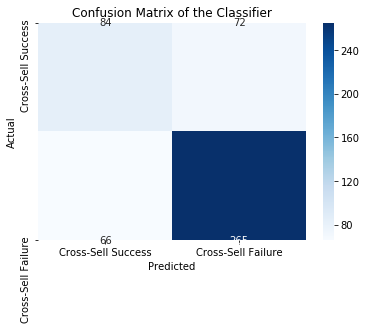

In [27]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross-Sell Success', 'Cross-Sell Failure']
         
         )

In [28]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.6695328840343946

In [29]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7135, 0.7166, 0.6695]


# Measuring Other Classification Model Types

<strong>KNN Classifier

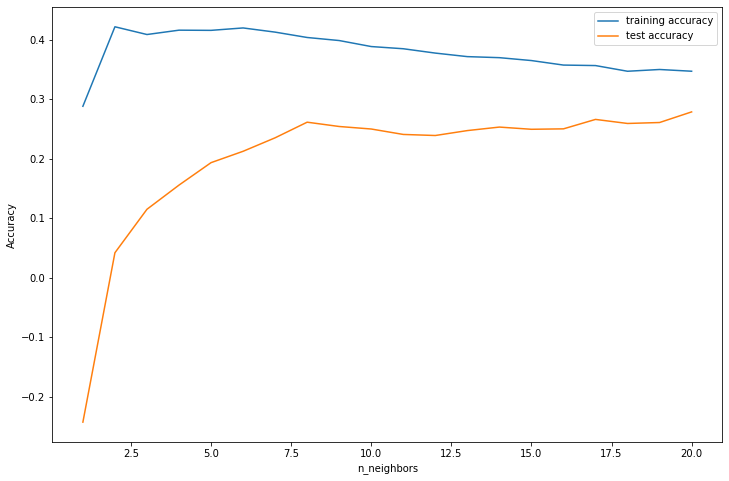

The optimal number of neighbors is: 20


In [30]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [31]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 802,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7875
Testing  ACCURACY: 0.7392
AUC Score        : 0.4573


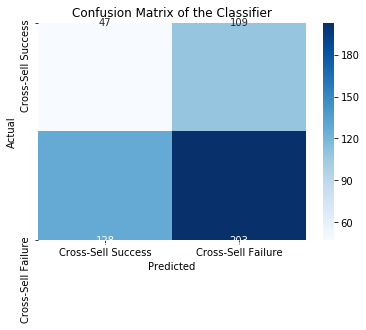

In [32]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Cross-Sell Success', 'Cross-Sell Failure'])

In [33]:
# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7135, 0.7166, 0.6695]
['KNN Classification', 0.7875, 0.7392, 0.7167]


# Classification Trees

We use the user-defined function by prof. Chase to create CART models

In [34]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<strong>Creating a full decision tree

In [35]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.8568
Testing  ACCURACY: 0.7084
AUC Score        : 0.6906


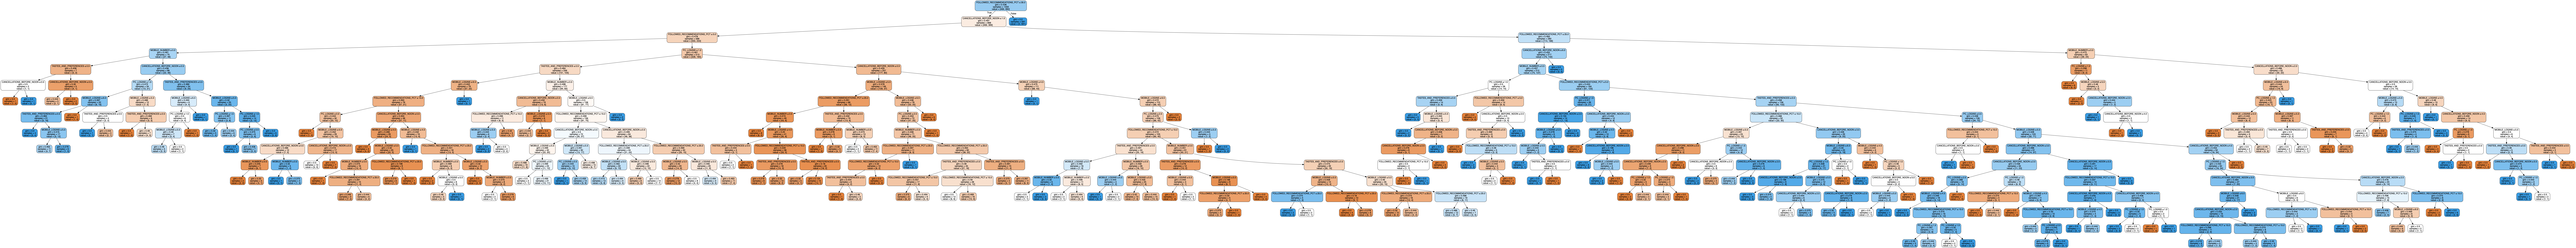

In [36]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

In [37]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7135, 0.7166, 0.6695]
['KNN Classification', 0.7875, 0.7392, 0.7167]
['Full Tree', 0.8568, 0.7084, 0.6906]


<strong>Let's prune the tree!

Training ACCURACY: 0.7868
Testing  ACCURACY: 0.7721
AUC Score        : 0.7612


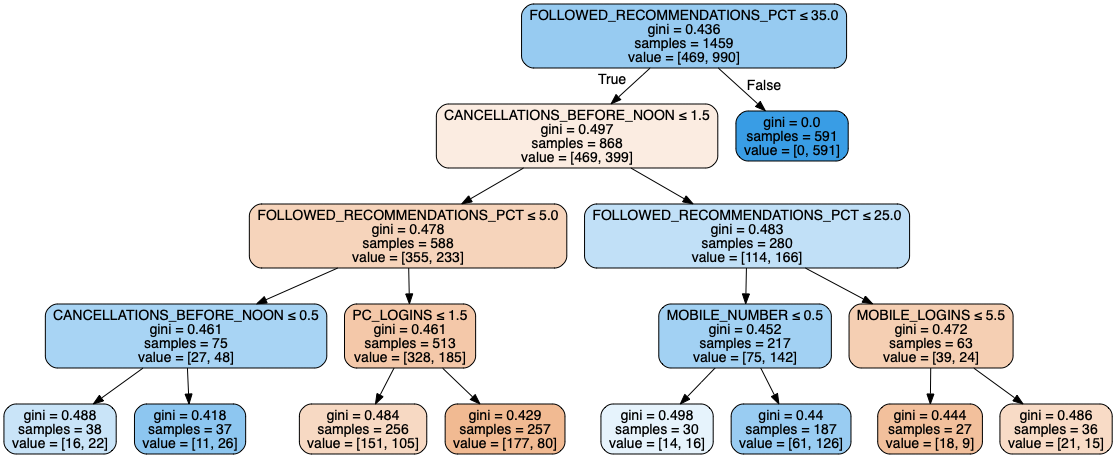

In [38]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


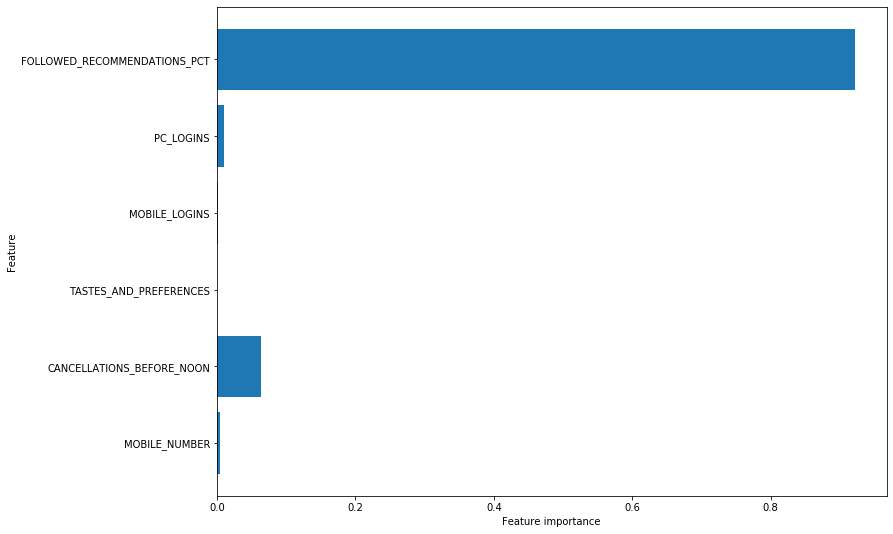

In [39]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

In [40]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612

In [41]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

# Hyperparameter Tuning

In [42]:
# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

<strong>Logistic Regression with Default Hyperparameters

In [43]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 222)

In [44]:
# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

Training ACCURACY: 0.7135
Testing  ACCURACY: 0.7166
AUC Score        : 0.6695


<strong>Hyperparameter Tuning with GridSearchCV 

Tuning the Logistic Regression

In [45]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Tuned Parameters  : {'C': 0.9, 'warm_start': True}
Tuned CV AUC      : 0.5714


In [46]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=222, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [47]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7217
Testing  ACCURACY: 0.7105
AUC Score        : 0.6616


In [48]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616

Tuning the Tree

In [49]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


Tuned Parameters  : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40, 'splitter': 'best'}
Tuned Training AUC: 0.6783


In [50]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7868
Testing  ACCURACY: 0.7721
AUC Score        : 0.7612


In [51]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616
5           Tuned Tree             0.7868            0.7721     0.7612

In [52]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)

# Ensemble Modeling

We use another user-defined function provided by prof. Chase

In [53]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

We split the dataset into training and validation set with significant values

In [54]:
# train/test split with the logit_sig variables
chef_data   =  original_df.loc[ : , candidate_dict['logit_sig']]
chef_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)

<strong>Random Forest

In [55]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

In [56]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8554
Testing  ACCURACY: 0.7105
AUC Score        : 0.6769


/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


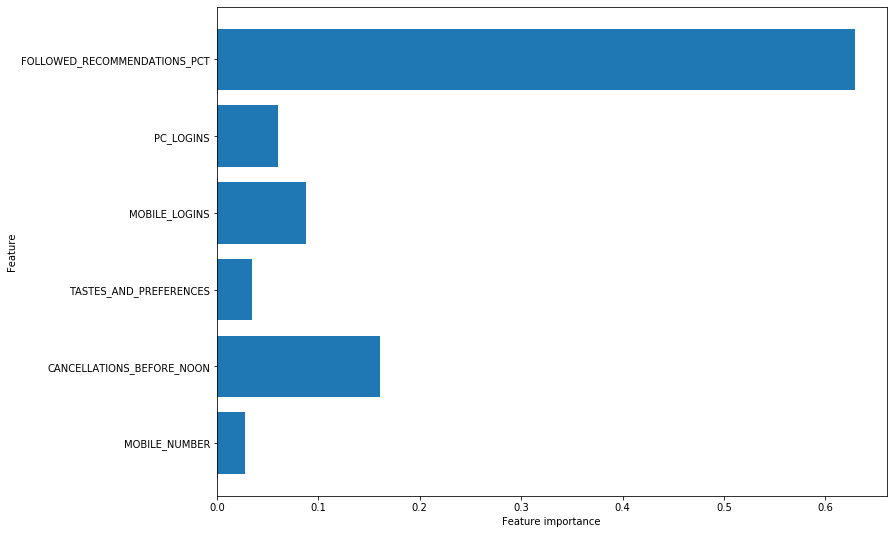

In [57]:
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

In [58]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616
5           Tuned Tree             0.7868            0.7721     0.7612
6        Random Forest             0.8554            0.7105     0.6769

We split the dataset into training and validation set with all the values




In [59]:
# train/test split with the logit_sig variables
chef_data   =  original_df.loc[ : , candidate_dict['logit_full']]
chef_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            chef_data,
            chef_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = chef_target)


In [60]:
# INSTANTIATING a random forest model with default values
rf_default_full = RandomForestClassifier(n_estimators     = 10,
                                         criterion        = 'gini',
                                         max_depth        = None,
                                         min_samples_leaf = 1,
                                         bootstrap        = True,
                                         warm_start       = False,
                                         random_state     = 802)


# FITTING the training data
rf_default_full_fit = rf_default_full.fit(X_train_full, y_train_full)


# PREDICTING based on the testing set
rf_default_full_pred = rf_default_full_fit.predict(X_test_full)


# SCORING the results
print('Training ACCURACY:', rf_default_full_fit.score(X_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', rf_default_full_fit.score(X_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_full_pred).round(4))

Training ACCURACY: 0.9931
Testing  ACCURACY: 0.7474
AUC Score        : 0.7227


/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


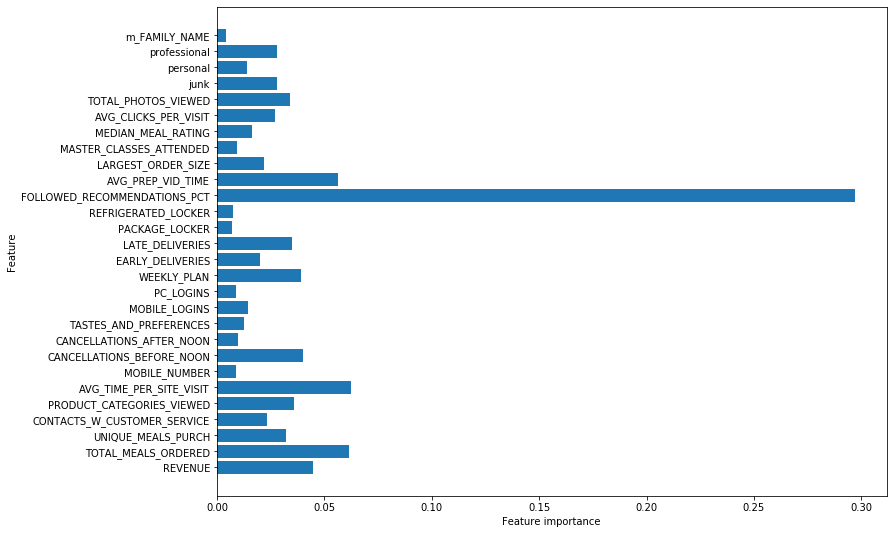

In [61]:
# plotting feature importance
plot_feature_importances(rf_default_full_fit,
                         train = X_train_full,
                         export = False)

<strong>Random Forest with Tuned Hyperparameters

In [62]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 222)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Tuned Parameters  : {'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 600, 'warm_start': True}
Tuned Training AUC: 0.5914


In [63]:
# INSTANTIATING the model object without hyperparameters
full_rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'gini',
                                       min_samples_leaf = 11,
                                       n_estimators     = 850,
                                       warm_start       = True,
                                       random_state     = 222)


# FIT step is needed as we are not using .best_estimator
full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

Training ACCURACY: 0.7964
Testing  ACCURACY: 0.7556
AUC Score        : 0.7169


In [64]:
# declaring model performance objects
rf_train_acc = full_rf_tuned_fit.score(X_train, y_train).round(4)
rf_test_acc  = full_rf_tuned_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = full_rf_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616
5           Tuned Tree             0.7868            0.7721     0.7612
6        Random Forest             0.8554            0.7105     0.6769
7  Tuned Random Forest             0.7964            0.7556     0.7169

<strong>Gradient Boosting Classifier

In [65]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7978
Testing ACCURACY : 0.7639
AUC Score        : 0.7483


In [66]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616
5           Tuned Tree             0.7868            0.7721     0.7612
6        Random Forest             0.8554            0.7105     0.6769
7  Tuned Random Forest             0.7964            0.7556     0.7169
8                  GBM             0.7978            0.7639     0.7483

In [67]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 222)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/francescapelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 1.3000000000000003, 'max_depth': 1, 'n_estimators': 50}
Tuned Training AUC: 0.6198


<strong>Tuning the Gradient Boosting Classifier

In [68]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 100,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7923
Testing  ACCURACY: 0.768
AUC Score        : 0.748


In [69]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7135            0.7166     0.6695
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
3          Pruned Tree             0.7868            0.7721     0.7612
4             Tuned LR             0.7217            0.7105     0.6616
5           Tuned Tree             0.7868            0.7721     0.7612
6        Random Forest             0.8554            0.7105     0.6769
7  Tuned Random Forest             0.7964            0.7556     0.7169
8                  GBM             0.7978            0.7639     0.7483
9            Tuned GBM             0.7923            0.7680     0.7480

In [70]:
model_performance.sort_values(by = 'AUC Value',
                              ascending = False)

Model  Training Accuracy  Testing Accuracy  AUC Value
3          Pruned Tree             0.7868            0.7721     0.7612
5           Tuned Tree             0.7868            0.7721     0.7612
8                  GBM             0.7978            0.7639     0.7483
9            Tuned GBM             0.7923            0.7680     0.7480
7  Tuned Random Forest             0.7964            0.7556     0.7169
1   KNN Classification             0.7875            0.7392     0.7167
2            Full Tree             0.8568            0.7084     0.6906
6        Random Forest             0.8554            0.7105     0.6769
0  Logistic Regression             0.7135            0.7166     0.6695
4             Tuned LR             0.7217            0.7105     0.6616

In [71]:
# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)